# Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.metrics import r2_score
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Data load

In [4]:
data = pd.read_csv('./data.csv', sep=',')

# Data Smoothing

In [5]:
sdata = data    # New object which contains original and smoothed data
sdata['si'] = 0 # New column for IR64 CHH count smoothed data
sdata['sa'] = 0 # New column for Azucena CHH count smoothed data
sdata['sr'] = 0 # New column for smoothed recombination data

In [6]:
# Simple exponential smoothing at 0.9  
for i in  range(1, len(sdata)):
    if sdata.loc[i-1,'chromosome'] == sdata.loc[i,'chromosome']:
        sdata.loc[i, 'si'] = sdata.loc[i-1, 'IR64_CHH']*0.1 + sdata.loc[i-1, 'si']*0.9
        sdata.loc[i, 'sa'] = sdata.loc[i-1, 'Azucena_CHH']*0.1 + sdata.loc[i-1, 'sa']*0.9
        sdata.loc[i, 'sr'] = sdata.loc[i-1, 'recombination_rate']*0.1 + sdata.loc[i-1, 'sr']*0.9  

# Training Extra Trees model with all IR64 data to predict recombination in AZUCENA chromosomes

In [7]:
X = sdata[['si']] 
y = sdata['sr']
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

ExtraTreesRegressor()

## Recombination prediction for chromosome 1

Correlation value and its p-value between real and predicted recombination rates
(0.6460957003223723, 1.0604566063304375e-53)
Coefficient of determination between real and predicted recombination rates
0.3915977990280811
Mean squared error between real and predicted recombination rates
0.02288844109192888


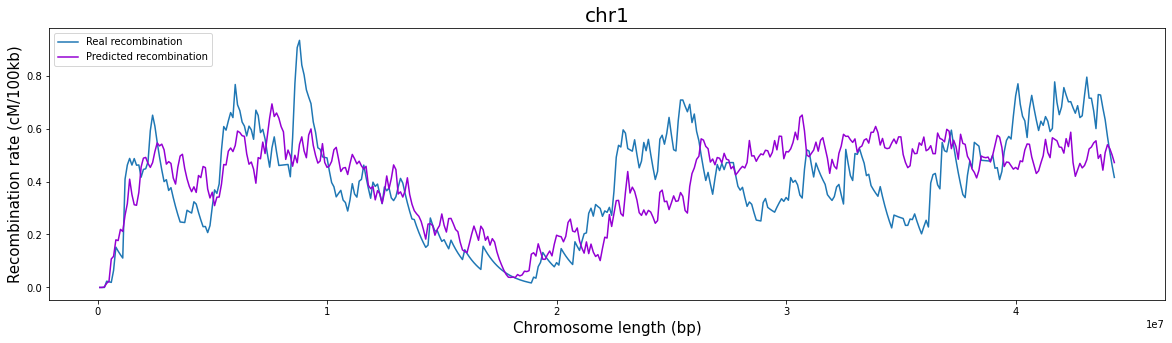

In [8]:
chr1 = sdata[(sdata.chromosome == 'chr1')]     # Object which contains information from chr1
sachr1 = chr1[['sa']]                          # Object which contains smoothed Azucena data from chr1

model_preds = model.predict(sachr1)            # Object which contains the predictions for chr1 using the model
smodel_preds= np.zeros(len(model_preds))       
for i in  range(1, len(model_preds)): 
    smodel_preds[i] = model_preds[i-1]*0.3 + smodel_preds[i-1]*0.7
chr1_pred = smodel_preds                       # Object which contains the smoothed predictions for chr1   

corr_chr1 = pearsonr(chr1.sr, chr1_pred)       # Correlation
r2_chr1 = r2_score(chr1.sr, chr1_pred)         # Coefficient of determination
mse_chr1 =mean_squared_error(chr1.sr, chr1_pred)        # Mean squared error

print('Correlation value and its p-value between real and predicted recombination rates')
print(corr_chr1)
print('Coefficient of determination between real and predicted recombination rates')
print(r2_chr1)
print('Mean squared error between real and predicted recombination rates')
print(mse_chr1)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize=(20,5))
plt.xlabel('Chromosome length (bp)', fontsize=15)  
plt.ylabel('Recombination rate (cM/100kb)', fontsize=15)
Recombination, = plt.plot(chr1.window_end,chr1.sr, label='Real recombination')
ap, = plt.plot(chr1.window_end,chr1_pred, label = 'Predicted recombination', color ='darkviolet')
plt.legend(loc="upper left")
plt.title("chr1", fontsize=20)
plt.show()

# Training Extra Trees model with all Azucena data to predict recombination in IR64 chromosomes

In [9]:
X = sdata[['sa']] 
y = sdata['sr']
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 1) 

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

ExtraTreesRegressor()

## Recombination prediction for chromosome 1

Correlation value and its p-value between real and predicted recombination rates
(0.6690101266809383, 8.398200393385329e-59)
Coefficient of determination between real and predicted recombination rates
0.11158757780001827
Mean squared error between real and predicted recombination rates
0.0334225868321615


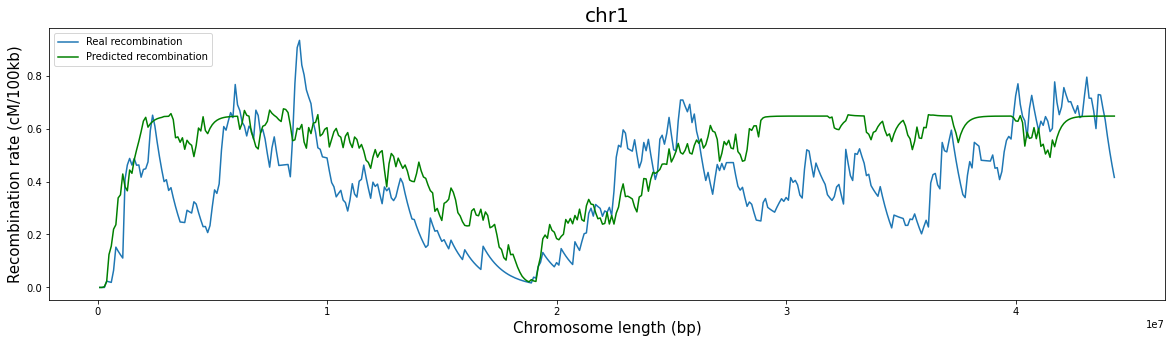

In [10]:
chr1 = sdata[(sdata.chromosome == 'chr1')]     # Object which contains information from chr1
sichr1 = chr1[['si']]                          # Object which contains smoothed IR64 data from chr1

model_preds = model.predict(sichr1)            # Object which contains the predictions for chr1 using the model
smodel_preds= np.zeros(len(model_preds))       
for i in  range(1, len(model_preds)): 
    smodel_preds[i] = model_preds[i-1]*0.3 + smodel_preds[i-1]*0.7
chr1_pred = smodel_preds                       # Object which contains the smoothed predictions for chr1   

corr_chr1 = pearsonr(chr1.sr, chr1_pred)       # Correlation
r2_chr1 = r2_score(chr1.sr, chr1_pred)         # Coefficient of determination
mse_chr1 =mean_squared_error(chr1.sr, chr1_pred)        # Mean squared error

print('Correlation value and its p-value between real and predicted recombination rates')
print(corr_chr1)
print('Coefficient of determination between real and predicted recombination rates')
print(r2_chr1)
print('Mean squared error between real and predicted recombination rates')
print(mse_chr1)

# PLOTTING RESULTS
fig, ax = plt.subplots(figsize=(20,5))
plt.xlabel('Chromosome length (bp)', fontsize=15)  
plt.ylabel('Recombination rate (cM/100kb)', fontsize=15)
Recombination, = plt.plot(chr1.window_end,chr1.sr, label='Real recombination')
ap, = plt.plot(chr1.window_end,chr1_pred, label = 'Predicted recombination', color ='green')
plt.legend(loc="upper left")
plt.title("chr1", fontsize=20)
plt.show()

## Additional information

To get the results for the remaining chromosomes, just replace 'chr1' with 'chr2', 'chr3' ... 'chr12'